In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras import layers


In [3]:
#load the MNIST data
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000,)


In [4]:
#printing images
print(x_train[10].shape)

(28, 28)


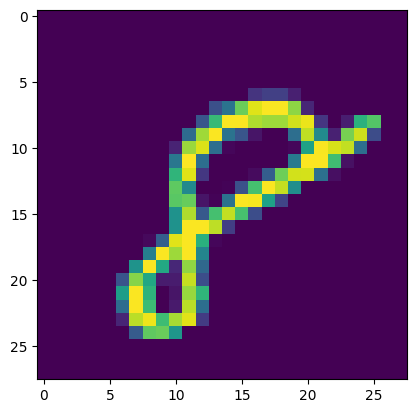

8


In [5]:
plt.imshow(x_train[60000-1])
plt.show()
print(y_train[60000-1])

In [6]:
#scaling?Normalasing the values
x_train=x_train/255
x_test=x_test/255
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(x_train.shape)


(60000, 28, 28, 1)


In [7]:
#building neural networks
#convolutional neura network
model=keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.Conv2D(256, (3,3), activation='relu'),
    # layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8744 - loss: 0.3889
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9823 - loss: 0.0639
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9884 - loss: 0.0446
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9904 - loss: 0.0342
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9926 - loss: 0.0271
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9942 - loss: 0.0221
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9950 - loss: 0.0172
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9954 - loss: 0.0178
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9959 - loss: 0.0156
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9960 - loss: 0.0145


In [9]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)
print(test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9912 - loss: 0.0494
0.9937000274658203
0.03929384797811508


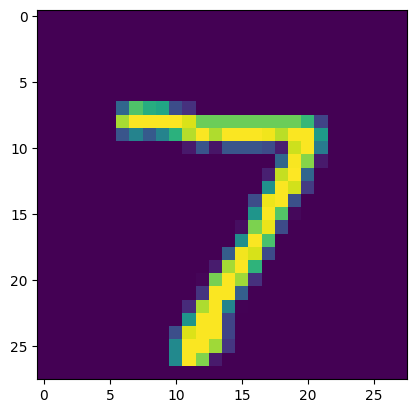

In [8]:
plt.imshow(x_test[0])
plt.show()

In [13]:
y_pred=model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[4.6491987e-20 9.3572255e-15 3.6473078e-11 1.2691793e-12 3.6777446e-11
 1.1639242e-17 8.7318917e-20 1.0000000e+00 1.3834285e-17 7.2938405e-11]


[[4.64919868e-20 9.35722548e-15 3.64730780e-11 ... 1.00000000e+00
  1.38342847e-17 7.29384053e-11]
 [1.79923436e-21 9.45856281e-17 1.00000000e+00 ... 5.86820176e-19
  2.55065787e-16 7.17519796e-23]
 [4.91713545e-18 1.00000000e+00 1.50918190e-15 ... 1.09556472e-16
  1.80302062e-13 1.98003110e-16]
 ...
 [1.64449613e-20 3.50286071e-19 1.03703377e-17 ... 1.20135956e-20
  2.21467981e-17 2.61519620e-13]
 [7.95284787e-19 3.66251463e-21 2.79342719e-19 ... 2.02161427e-21
  1.58404235e-15 1.69684469e-15]
 [3.73439208e-15 8.63537847e-17 5.76729596e-18 ... 1.16459567e-23
  8.10496147e-14 1.14903840e-19]]


In [16]:
label_1=np.argmax(y_pred[0])
print(label_1)

7


In [17]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [21]:
print(y_pred_labels[10000-1])
print(y_test[10000-1])

6
6


In [22]:
#Confusion Matrix
cm=confusion_matrix(y_test,y_pred_labels)
print(cm)

tf.Tensor(
[[ 972    1    1    0    0    0    3    1    0    2]
 [   0 1132    0    1    0    0    0    1    1    0]
 [   0    0 1029    0    0    0    0    3    0    0]
 [   0    0    2 1005    0    3    0    0    0    0]
 [   0    0    0    0  979    0    0    0    0    3]
 [   0    0    0    5    0  886    1    0    0    0]
 [   2    3    0    0    3    2  948    0    0    0]
 [   0    4    5    0    0    0    0 1017    1    1]
 [   0    0    2    1    0    1    1    0  968    1]
 [   0    0    0    0    4    3    0    0    1 1001]], shape=(10, 10), dtype=int32)


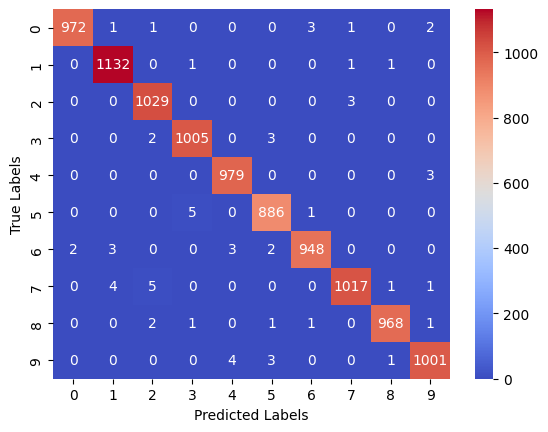

In [23]:
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")
plt.show()

Predictive System

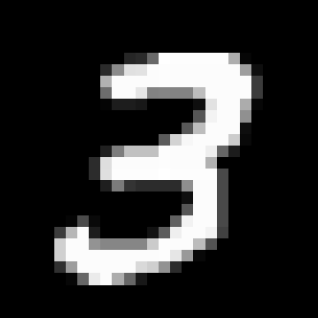

In [24]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)

In [26]:
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)
grayscale.shape
input_image_resized=cv2.resize(grayscale,(28,28))
input_image_resized.shape

(28, 28)

In [27]:
input_image_resized=input_image_resized/255

In [36]:
image_reshaped=np.reshape(input_image_resized,[1,28,28,1])
type(image_reshaped)

numpy.ndarray

In [37]:
input_prediction=model.predict(image_reshaped)
pred=np.argmax(input_prediction)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step


3

Path of the image to be predicted: /content/MNIST_digit.png


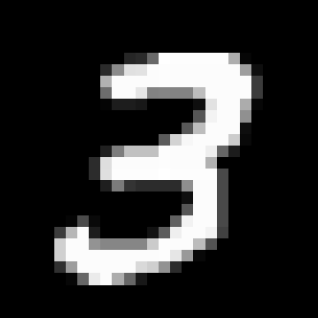

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
The Handwritten Digit is recognised as  3


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28,1])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)